In [192]:
import av
from av.video.frame import VideoFrame
from av.video.stream import VideoStream

In [1]:
import numpy as np

In [2]:
import _pickle as pickle

In [3]:
from matplotlib import pyplot as plt

In [4]:
from IPython.display import clear_output

In [196]:
from scipy.signal import convolve
from scipy.signal import convolve2d

In [197]:
color_to_bw = np.array([0.2989, 0.5870, 0.1140])
sobel_kernel = np.array([[-1, -2, -1],
                         [ 0,  0,  0],
                         [ 1,  2,  1]])

In [5]:
def SaveArray(name, array):
    with open('./Data/'+name+'.pkl', 'wb') as out:
        pickle.dump(array, out, 2)
        

In [198]:
def OpenArray(name, dump_num):
    with open('./Data/'+name+str(dump_num)+'.pkl', 'rb') as inp:
        frames = pickle.load(inp)
    return frames

In [242]:
def GetFrames(name, frames_num):
    
    input_container = av.open('./mp4movie/'+name+'.mp4')
    total_frames = input_container.streams.video[0].frames
    input_packets = input_container.demux() 
    skip = 2*(total_frames)//frames_num    
    array_list_squared=[]
    count_frames=0
    i=0
    
    p = './../pytorch-CycleGAN-and-pix2pix/datasets/winnie2winnie'
    
    print('Total Frames of input video: {}'.format(total_frames))
    print('Skip window = {}'.format(skip))
    print('_____________________________________________________')
    print("Added {} squared frames in array".format(count_frames))
    
    for packet in input_packets:

        if isinstance(packet.stream, VideoStream):
            frames = packet.decode()
            for raw_frame in frames:
                
                r_ind = raw_frame.index
                if r_ind >= 50000 and r_ind < 52500:
                    
                    w = raw_frame.width
                    h = raw_frame.height
                    
                    frame = raw_frame.reformat(w, h, 'rgb24')
                    frameBAD = raw_frame.reformat(256, 256, 'rgb24')
                    
                    array = frame.to_nd_array()

                    array_left =  array[h//2-128:h//2+128, w//2-256:w//2,:]
                    imsave(p + '/testB/' + str(count_frames) + '.jpg', array_left)
                    count_frames+=1
                    
                    array_right = array[h//2-128: h//2+128, w//2:w//2+256,:]
                    imsave(p + '/testB/' + str(count_frames) + '.jpg', array_right)
                    count_frames+=1
                    
                    
                    clear_output(wait=True)
                    print('Total Frames of input video: {}'.format(total_frames))
                    print('Original resolution: {}x{}'.format(w,h))
                    print('Skip window = {}'.format(skip))
                    print('_____________________________________________________')
                    print('Index - {}'.format(r_ind))
                    print("Added {} squared frames in array".format(count_frames))
                if r_ind == 52500:
                    return

In [254]:
!ls

Data  mp4movie	video.ipynb


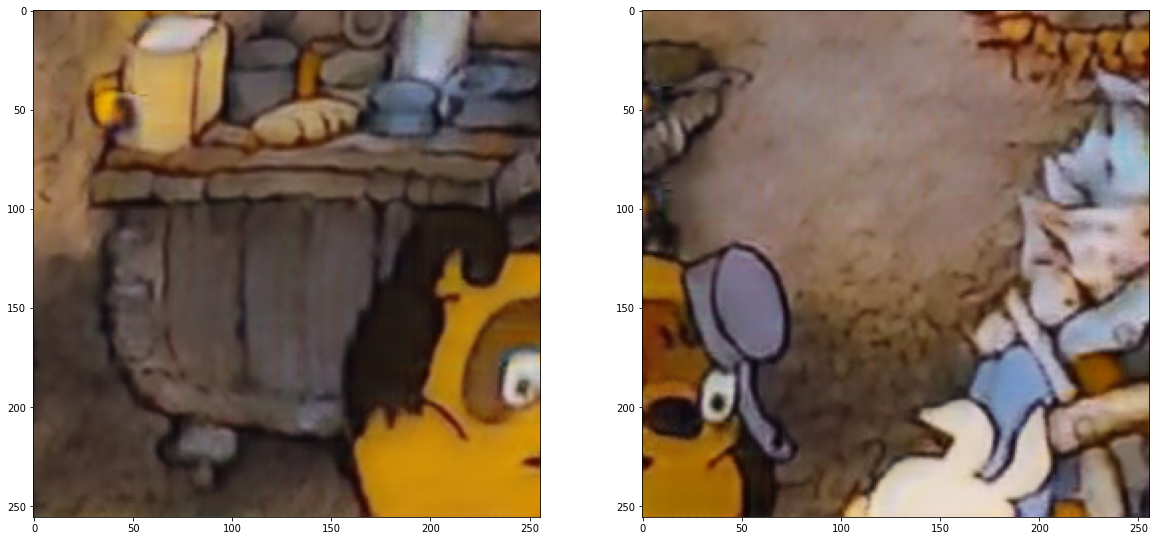

In [1]:
from matplotlib import pyplot as plt

img_left = plt.imread('./Data/images/300_fake_B.png')
img_right = plt.imread('./Data/images/301_fake_B.png')
plt.figure(figsize=(20, 15))
ax1 = plt.subplot(121)
ax1.imshow(img_left)
ax2 = plt.subplot(122)
ax2.imshow(img_right)
plt.show()

In [36]:
res = []
for i in range(0, 1000, 2):
#     img_left = plt.imread('./../pytorch-CycleGAN-and-pix2pix/datasets/winnie2winnie/testB/'+str(i)+'.jpg')
#     img_right = plt.imread('./../pytorch-CycleGAN-and-pix2pix/datasets/winnie2winnie/testB/'+str(i+1)+'.jpg')
    img_left = plt.imread('./Data/images_jpg/'+str(i)+'_fake_B.jpg')
    img_right = plt.imread('./Data/images_jpg/'+str(i+1)+'_fake_B.jpg')
    res += [(np.array(img_left), np.array(img_right))]
    clear_output(True)
    print(i)
    
SaveArray('RU2USA_forward', res)

998


In [33]:
import cv2

Data  mp4movie	video.ipynb


In [35]:
"""
png2jpg
"""
res = []
for i in range(0, 1000, 2):
    
    img_left = cv2.imread('./Data/images_ru/'+str(i)+'_fake_B.png')
    img_right = cv2.imread('./Data/images_ru/'+str(i+1)+'_fake_B.png')

    cv2.imwrite('./Data/images_jpg/'+str(i)+'_fake_B.jpg', img_left, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
    cv2.imwrite('./Data/images_jpg/'+str(i+1)+'_fake_B.jpg', img_right, [int(cv2.IMWRITE_JPEG_QUALITY), 100])
    clear_output(True)
    print(i)
    
SaveArray('RUS2USA2', res)

998


In [153]:
from matplotlib.image import imsave

In [191]:
for c, img in enumerate(Arr):
    imsave(p + '/testB/' + str(c) + '.jpg', img)

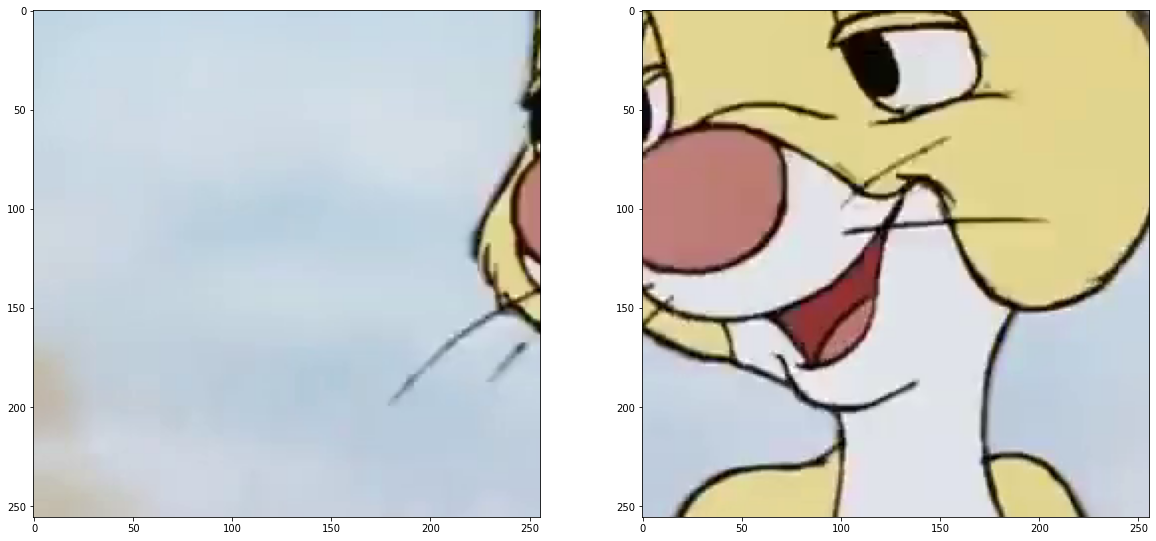

In [190]:
"""
OpenArray(НазваниеВидео, НомерДампа(0..7))
В каждом дампе нампи массив (1000, 256, 256, 3)
"""
Arr = OpenArray('W_ENG',0)
plt.figure(figsize=(20, 15))
ax1 = plt.subplot(121)
ax1.imshow(Arr[2])
ax2 = plt.subplot(122)
ax2.imshow(Arr[3])
plt.show()
show(Arr, 1)

In [127]:
"""
Четные кадры - левая сторона оригинала
Нечетные кадры - правая сторона оригинала
"""
def show(array, frame):
    plt.figure(figsize=(20, 15))
    ax1 = plt.subplot(121)
    ax1.imshow(array[frame-1])
    ax2 = plt.subplot(122)
    ax2.imshow(array[frame])
    plt.show()

In [5]:
def get_sobel_img(img):
    bw_image = convolve(img.flatten(), color_to_bw, 'same')[::3].reshape(*img.shape[:2])
    res_y = convolve2d(bw_image, sobel_kernel.T, 'same')
    res_x = convolve2d(bw_image, sobel_kernel, 'same')
    return (res_x**2 + res_y**2)**0.5

In [6]:
'''
Batches 0-4 each
'''
def med_pix(name):
    med=[]
    
    for batch in range(5):
        contour_values = []
        frames = OpenArray(name, batch)
        
        for frame in frames:
            contour = get_sobel_img(frame)
            contour = np.where(contour>255, 1, 0)
            contour_values.append(contour.sum())
        
        med.append(round(np.median(contour_values)))
        
        clear_output(wait=True)
        print('Batch {} handled\nMedian={}'.format(batch+1, med[-1]))

        
    return med

In [9]:
med_spider = med_pix('SpiderMan')
print(med_spider)
print(np.median(med_spider))

Batch 5 handled
Avg=1690.0
[1536.0, 910.0, 1711.0, 1162.0, 1690.0]
1536.0


In [10]:
med_castle = med_pix('Castle_in_the_Sky')
print(med_castle)
print(np.mean(med_castle))

Batch 5 handled
Avg=3000.0
[2712.0, 2447.0, 1872.0, 2346.0, 3000.0]
2475.4


In [7]:
def get_clean(name):
    avg=[]
    s = 0
    i = 0
    clean = []
    
    for batch in range(4,5):
        contour_values = []
        frames = OpenArray(name, batch)
        
        for frame in frames:
            contour = get_sobel_img(frame)
            contour = np.where(contour>255, 1, 0)
            
            if contour.sum() > 1536.0:
                clean += [frame]
                s += 1
            
            
            clear_output(wait=True)
            print('Batch {} handled\nGot {} frames'.format(batch+1, s))
    del frames
    SaveArray('Spider5', np.array(clean))
    print('Saved V')

In [ ]:
get_clean('SpiderMan')

Batch 5 handled
Got 1098 frames


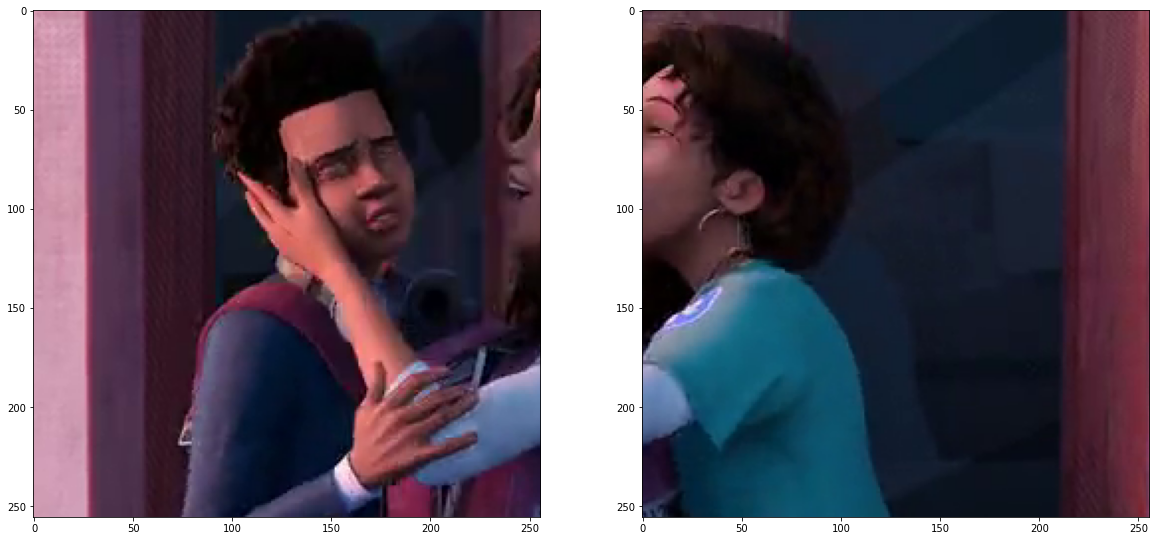

In [44]:
plt.figure(figsize=(20, 15))
ax1 = plt.subplot(121)
ax1.imshow(FramesInNumpy[240])
ax2 = plt.subplot(122)
ax2.imshow(FramesInNumpy[241])
plt.show()